<a href="https://colab.research.google.com/github/BruceXavierChou/stock_analysis/blob/main/%E3%80%8Cstk_ch04_ipynb%E3%80%8D%E7%9A%84%E5%89%AF%E6%9C%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CH-04 讓 AI 計算技術指標及資料視覺化

## 4-1 技術指標公式太複雜？讓 AI 自動化計算

### 1️⃣ 安裝及匯入套件

In [1]:
!pip install openai
!pip install yfinance
from  openai import OpenAI, OpenAIError # 串接 OpenAI API
import yfinance as yf
import pandas as pd # 資料處理套件
import datetime as dt # 時間套件

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 336.7/336.7 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 4.1 MB/s eta 0:00:00


### 2️⃣ 取得股票資料

In [3]:
# 輸入股票代號
# stock_id = "2330.tw"
stock_id = "NVDA"
# 抓取半年資料
end = dt.date.today() # 資料結束時間
start = end - dt.timedelta(days=180) # 資料開始時間
df = yf.download(stock_id, start=start, end=end).reset_index()

print(df)

[*********************100%%**********************]  1 of 1 completed

          Date        Open        High         Low       Close   Adj Close  \
0   2024-02-08   70.073997   70.793999   69.455002   69.640999   69.632011   
1   2024-02-09   70.532997   72.184998   70.211998   72.133003   72.123695   
2   2024-02-12   72.599998   74.611000   71.250000   72.248001   72.238678   
3   2024-02-13   70.400002   73.449997   69.620003   72.127998   72.118690   
4   2024-02-14   73.202003   74.236000   71.938004   73.900002   73.890465   
..         ...         ...         ...         ...         ...         ...   
118 2024-07-30  111.519997  111.989998  102.540001  103.730003  103.730003   
119 2024-07-31  112.900002  118.339996  110.879997  117.019997  117.019997   
120 2024-08-01  117.529999  120.160004  106.809998  109.209999  109.209999   
121 2024-08-02  103.760002  108.720001  101.370003  107.269997  107.269997   
122 2024-08-05   92.059998  103.410004   90.690002  100.449997  100.449997   

        Volume  
0    414422000  
1    436637000  
2    6137100

### 3️⃣ 輸入 OpenAI API KEY

In [4]:
import getpass
api_key = getpass.getpass("請輸入金鑰：")
client = OpenAI(api_key=api_key)

請輸入金鑰：··········


### 4️⃣ 創建 GPT 3.5 模型函式

In [5]:
# GPT 3.5 模型
def get_reply(messages):
  try:
    response = client.chat.completions.create(model="gpt-3.5-turbo",
                         messages=messages)
    reply = response.choices[0].message.content
  except OpenAIError as err:
    reply = f"發生 {err.type} 錯誤\n{err.message}"
  return reply

# 設定 AI 角色, 使其依據使用者需求進行 df 處理
def ai_helper(df, user_msg):

  msg = [{
    "role":
    "system",
    "content":
    f"As a professional code generation robot, \
      I require your assistance in generating Python code \
      based on specific user requirements. To proceed, \
      I will provide you with a dataframe (df) that follows the \
      format {df.columns}. Your task is to carefully analyze the \
      user's requirements and generate the Python code \
      accordingly.Please note that your response should solely \
      consist of the code itself, \
      and no additional information should be included."
  }, {
    "role":
    "user",
    "content":
    f"The user requirement:{user_msg} \n\
       Your task is to develop a Python function named \
      'calculate(df)'. This function should accept a dataframe as \
      its parameter. Ensure that you only utilize the columns \
      present in the dataset, specifically {df.columns}. \
      After processing, the function should return the processed \
      dataframe. Your response should strictly contain the Python \
      code for the 'calculate(df)' function \
      and exclude any unrelated content."
  }]

  reply_data = get_reply(msg)
  cleaned_code = reply_data.replace("```", "")
  cleaned_code = cleaned_code.replace("python", "")

  return cleaned_code

### 讓 AI 自動生成技術指標程式碼

### 5️⃣ 計算移動平均線

In [6]:
code_str = ai_helper(df, "計算8日MA與13日MA ")
print(code_str)
exec(code_str)
new_df = calculate(df)
new_df.tail()

def calculate(df):
    df['8_day_MA'] = df['Close'].rolling(window=8).mean()
    df['13_day_MA'] = df['Close'].rolling(window=13).mean()
    return df


,Date,Open,High,Low,Close,Adj Close,Volume,8_day_MA,13_day_MA
118,2024-07-30,111.519997,111.989998,102.540001,103.730003,103.730003,486833300,114.871249,118.622307
119,2024-07-31,112.900002,118.339996,110.879997,117.019997,117.019997,473174200,114.757499,117.682307
120,2024-08-01,117.529999,120.160004,106.809998,109.209999,109.209999,523462300,112.966249,116.203076
121,2024-08-02,103.760002,108.720001,101.370003,107.269997,107.269997,482027500,111.051249,114.734614
122,2024-08-05,92.059998,103.410004,90.690002,100.449997,100.449997,549739200,109.326248,113.385383


### 6️⃣ 計算 MACD

In [7]:
code_str = ai_helper(df, "先計算 EMA 再計算 MACD, 欄位名稱用 MACD_Histogram 命名")
print(code_str)
exec(code_str)
new_df = calculate(df)
new_df.tail()


import pandas as pd

def calculate(df):
    df['EMA_8'] = df['Close'].ewm(span=8, adjust=False).mean()
    df['EMA_13'] = df['Close'].ewm(span=13, adjust=False).mean()
    
    df['MACD'] = df['EMA_8'] - df['EMA_13']
    
    df['MACD_Signal'] = df['MACD'].ewm(span=9, adjust=False).mean()
    
    df['MACD_Histogram'] = df['MACD'] - df['MACD_Signal']
    
    return df



,Date,Open,High,Low,Close,Adj Close,Volume,8_day_MA,13_day_MA,EMA_8,EMA_13,MACD,MACD_Signal,MACD_Histogram
118,2024-07-30,111.519997,111.989998,102.540001,103.730003,103.730003,486833300,114.871249,118.622307,113.628469,116.649085,-3.020616,-1.650309,-1.370306
119,2024-07-31,112.900002,118.339996,110.879997,117.019997,117.019997,473174200,114.757499,117.682307,114.382142,116.702072,-2.319930,-1.784234,-0.535697
120,2024-08-01,117.529999,120.160004,106.809998,109.209999,109.209999,523462300,112.966249,116.203076,113.232777,115.631776,-2.398999,-1.907187,-0.491813
121,2024-08-02,103.760002,108.720001,101.370003,107.269997,107.269997,482027500,111.051249,114.734614,111.907714,114.437236,-2.529522,-2.031654,-0.497868
122,2024-08-05,92.059998,103.410004,90.690002,100.449997,100.449997,549739200,109.326248,113.385383,109.361555,112.439059,-3.077504,-2.240824,-0.836680


### 7️⃣ 計算 RSI

In [8]:
code_str = ai_helper(df, "計算 RSI ")
print(code_str)
exec(code_str)
new_df = calculate(df)
new_df.tail()

def calculate(df):
    delta = df['Close'].diff()
    gain = delta.where(delta > 0, 0)
    loss = -delta.where(delta < 0, 0)
    
    avg_gain = gain.rolling(window=14, min_periods=1).mean()
    avg_loss = loss.rolling(window=14, min_periods=1).mean()
    
    rs = avg_gain / avg_loss
    df['RSI'] = 100 - (100 / (1 + rs))
    
    return df


,Date,Open,High,Low,Close,Adj Close,Volume,8_day_MA,13_day_MA,EMA_8,EMA_13,MACD,MACD_Signal,MACD_Histogram,RSI
118,2024-07-30,111.519997,111.989998,102.540001,103.730003,103.730003,486833300,114.871249,118.622307,113.628469,116.649085,-3.020616,-1.650309,-1.370306,21.043835
119,2024-07-31,112.900002,118.339996,110.879997,117.019997,117.019997,473174200,114.757499,117.682307,114.382142,116.702072,-2.319930,-1.784234,-0.535697,41.294863
120,2024-08-01,117.529999,120.160004,106.809998,109.209999,109.209999,523462300,112.966249,116.203076,113.232777,115.631776,-2.398999,-1.907187,-0.491813,34.730897
121,2024-08-02,103.760002,108.720001,101.370003,107.269997,107.269997,482027500,111.051249,114.734614,111.907714,114.437236,-2.529522,-2.031654,-0.497868,34.137562
122,2024-08-05,92.059998,103.410004,90.690002,100.449997,100.449997,549739200,109.326248,113.385383,109.361555,112.439059,-3.077504,-2.240824,-0.836680,31.873507


### 8️⃣ 計算布林通道

In [9]:
code_str = ai_helper(df, "請計算1.5個標準差的布林通道, 欄位以 Upper_Band 和 Lower_Band 命名")
print(code_str)
exec(code_str)
new_df = calculate(df)
new_df.tail()

def calculate(df):
    df['Upper_Band'] = df['Close'].rolling(window=20).mean() + (df['Close'].rolling(window=20).std() * 1.5)
    df['Lower_Band'] = df['Close'].rolling(window=20).mean() - (df['Close'].rolling(window=20).std() * 1.5)
    return df


,Date,Open,High,Low,Close,Adj Close,Volume,8_day_MA,13_day_MA,EMA_8,EMA_13,MACD,MACD_Signal,MACD_Histogram,RSI,Upper_Band,Lower_Band
118,2024-07-30,111.519997,111.989998,102.540001,103.730003,103.730003,486833300,114.871249,118.622307,113.628469,116.649085,-3.020616,-1.650309,-1.370306,21.043835,133.971199,110.104802
119,2024-07-31,112.900002,118.339996,110.879997,117.019997,117.019997,473174200,114.757499,117.682307,114.382142,116.702072,-2.319930,-1.784234,-0.535697,41.294863,133.803188,109.707812
120,2024-08-01,117.529999,120.160004,106.809998,109.209999,109.209999,523462300,112.966249,116.203076,113.232777,115.631776,-2.398999,-1.907187,-0.491813,34.730897,133.315620,108.288380
121,2024-08-02,103.760002,108.720001,101.370003,107.269997,107.269997,482027500,111.051249,114.734614,111.907714,114.437236,-2.529522,-2.031654,-0.497868,34.137562,133.036140,106.711859
122,2024-08-05,92.059998,103.410004,90.690002,100.449997,100.449997,549739200,109.326248,113.385383,109.361555,112.439059,-3.077504,-2.240824,-0.836680,31.873507,132.809644,104.163356


### 9️⃣ 能量潮指標 (On-Balance Volumem, OBV)

In [10]:
code_str = ai_helper(df, "計算 OBV 指標")
print(code_str)
exec(code_str)
new_df = calculate(df)
new_df.tail()

def calculate(df):
    df['OBV'] = (df['Volume'] * ((df['Close'] - df['Close'].shift(1)) > 0).astype(int)).cumsum()
    return df


,Date,Open,High,Low,Close,Adj Close,Volume,8_day_MA,13_day_MA,EMA_8,EMA_13,MACD,MACD_Signal,MACD_Histogram,RSI,Upper_Band,Lower_Band,OBV
118,2024-07-30,111.519997,111.989998,102.540001,103.730003,103.730003,486833300,114.871249,118.622307,113.628469,116.649085,-3.020616,-1.650309,-1.370306,21.043835,133.971199,110.104802,28191600100
119,2024-07-31,112.900002,118.339996,110.879997,117.019997,117.019997,473174200,114.757499,117.682307,114.382142,116.702072,-2.319930,-1.784234,-0.535697,41.294863,133.803188,109.707812,28664774300
120,2024-08-01,117.529999,120.160004,106.809998,109.209999,109.209999,523462300,112.966249,116.203076,113.232777,115.631776,-2.398999,-1.907187,-0.491813,34.730897,133.315620,108.288380,28664774300
121,2024-08-02,103.760002,108.720001,101.370003,107.269997,107.269997,482027500,111.051249,114.734614,111.907714,114.437236,-2.529522,-2.031654,-0.497868,34.137562,133.036140,106.711859,28664774300
122,2024-08-05,92.059998,103.410004,90.690002,100.449997,100.449997,549739200,109.326248,113.385383,109.361555,112.439059,-3.077504,-2.240824,-0.836680,31.873507,132.809644,104.163356,28664774300


### 讓 AI 自動統整 Dataframe

### 🔟 將日頻資料轉換成月頻資料

In [11]:
code_str = ai_helper(df, "請將日K線的資料轉換成月K線 ")
print(code_str)
exec(code_str)
new_df = df
df_monthly = new_df
df_monthly = calculate(df_monthly)
df_monthly.tail()

def calculate(df):
    df['Date'] = pd.to_datetime(df['Date'])
    df.set_index('Date', inplace=True)
    monthly_df = df.resample('M').agg({
        'Open': 'first',
        'High': 'max',
        'Low': 'min',
        'Close': 'last',
        'Adj Close': 'last',
        'Volume': 'sum',
        '8_day_MA': 'last',
        '13_day_MA': 'last',
        'EMA_8': 'last',
        'EMA_13': 'last',
        'MACD': 'last',
        'MACD_Signal': 'last',
        'MACD_Histogram': 'last',
        'RSI': 'last',
        'Upper_Band': 'last',
        'Lower_Band': 'last',
        'OBV': 'last'
    })
    return monthly_df


,Open,High,Low,Close,Adj Close,Volume,8_day_MA,13_day_MA,EMA_8,EMA_13,MACD,MACD_Signal,MACD_Histogram,RSI,Upper_Band,Lower_Band,OBV
Date,,,,,,,,,,,,,,,,,
2024-04-30,90.299004,92.224998,75.606003,86.402000,86.394905,10074181000,82.793000,84.050154,84.893217,84.892341,0.000876,-0.624819,0.625695,49.213520,90.697245,79.869855,16542688000
2024-05-31,85.077003,115.819000,81.254997,109.633003,109.624001,9647971000,106.182876,101.312846,106.729894,103.137265,3.592629,2.800843,0.791786,77.971289,110.695746,84.102855,22156816000
2024-06-30,113.621002,140.759995,112.002998,123.540001,123.540001,7442539100,126.382500,126.895385,125.119970,124.310930,0.809040,2.133520,-1.324480,52.828980,133.297481,114.385120,25793815100
2024-07-31,123.470001,136.149994,102.540001,117.019997,117.019997,6405438600,114.757499,117.682307,114.382142,116.702072,-2.319930,-1.784234,-0.535697,41.294863,133.803188,109.707812,28664774300
2024-08-31,117.529999,120.160004,90.690002,100.449997,100.449997,1555229000,109.326248,113.385383,109.361555,112.439059,-3.077504,-2.240824,-0.836680,31.873507,132.809644,104.163356,28664774300


## 4-2 資料視覺化

### 1️⃣1️⃣ 安裝及匯入套件

In [12]:
import matplotlib.pyplot as plt

### 畫出簡易股價圖

### 1️⃣2️⃣ 讓我們再一次檢視資料格式吧！

In [13]:
new_df = new_df.reset_index() # 重設 index
new_df['Date'] = pd.to_datetime(new_df['Date']) # 將 Date 轉換為 datetime 類別
new_df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume,8_day_MA,13_day_MA,EMA_8,EMA_13,MACD,MACD_Signal,MACD_Histogram,RSI,Upper_Band,Lower_Band,OBV
118,2024-07-30,111.519997,111.989998,102.540001,103.730003,103.730003,486833300,114.871249,118.622307,113.628469,116.649085,-3.020616,-1.650309,-1.370306,21.043835,133.971199,110.104802,28191600100
119,2024-07-31,112.900002,118.339996,110.879997,117.019997,117.019997,473174200,114.757499,117.682307,114.382142,116.702072,-2.319930,-1.784234,-0.535697,41.294863,133.803188,109.707812,28664774300
120,2024-08-01,117.529999,120.160004,106.809998,109.209999,109.209999,523462300,112.966249,116.203076,113.232777,115.631776,-2.398999,-1.907187,-0.491813,34.730897,133.315620,108.288380,28664774300
121,2024-08-02,103.760002,108.720001,101.370003,107.269997,107.269997,482027500,111.051249,114.734614,111.907714,114.437236,-2.529522,-2.031654,-0.497868,34.137562,133.036140,106.711859,28664774300
122,2024-08-05,92.059998,103.410004,90.690002,100.449997,100.449997,549739200,109.326248,113.385383,109.361555,112.439059,-3.077504,-2.240824,-0.836680,31.873507,132.809644,104.163356,28664774300


### 1️⃣3️⃣ 使用 matplotlib 畫出收盤價的折線圖

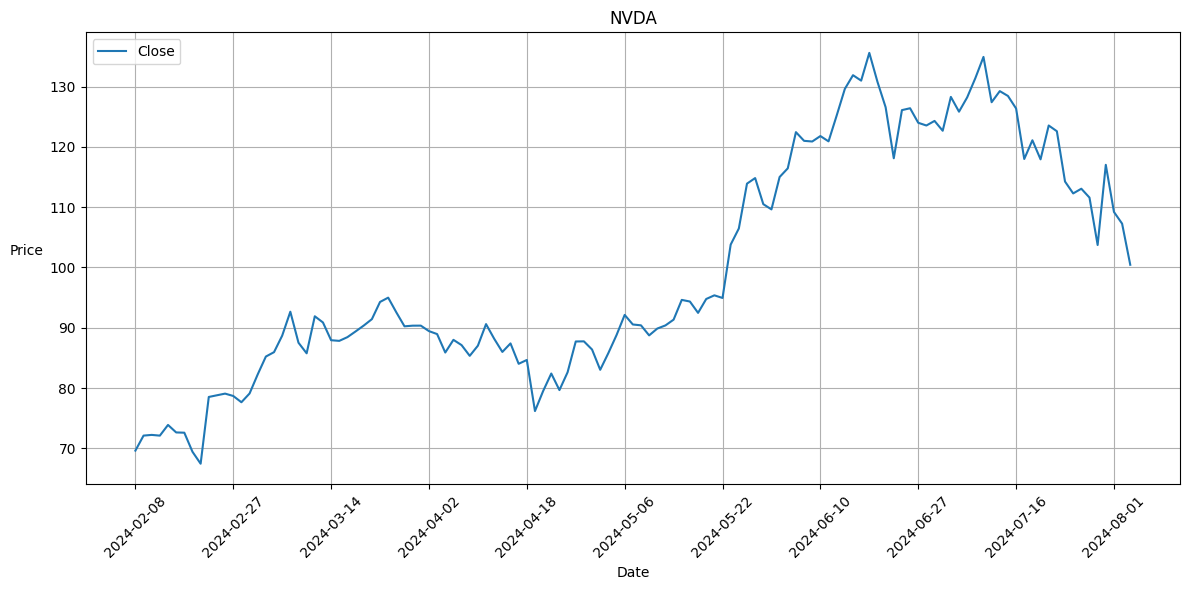

In [14]:
# 畫布尺寸大小設定
plt.figure(figsize=(12, 6))

# 設定要繪製的資料欄位
plt.plot(new_df['Close'], label='Close')

# 設定 x 軸的時間
num = 10
date = new_df["Date"].dt.strftime('%Y-%m-%d')
plt.xticks(date[::len(date)//num].index,
           date[::len(date)//num], rotation = 45)

# 設定圖表的標題，x 軸和 y 軸的標籤
plt.title(f'{stock_id}')   # 將股票代號設為圖標
plt.xlabel('Date')         # x 軸標籤
plt.ylabel('Price', rotation=0, ha='right')  # y 軸標籤
plt.legend(loc='upper left') # 在左上角顯示圖例
plt.grid(True) # 在圖上顯示網格
plt.tight_layout()

# 顯示圖表
plt.show()

### 1️⃣4️⃣ 加入成交量

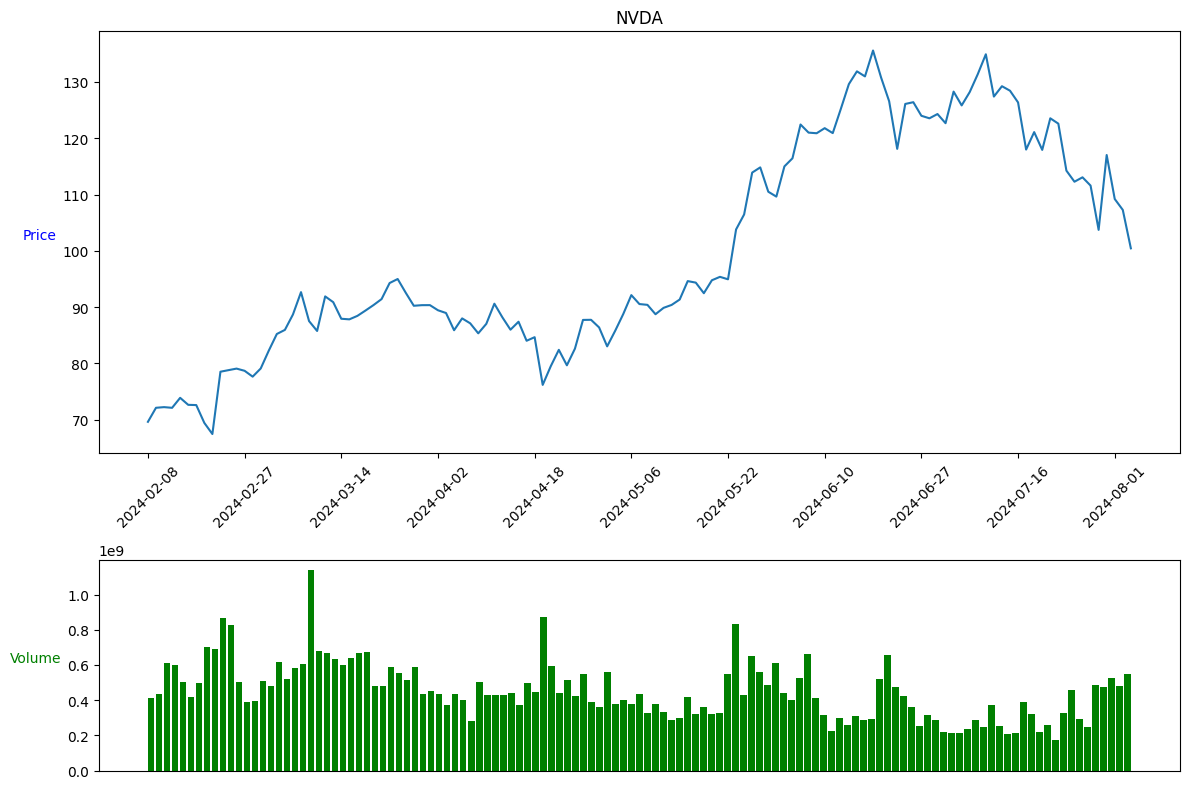

In [15]:
# 創建兩張子圖
fig, (ax1, ax2) = plt.subplots(2, 1,
                figsize=(12, 8),
                gridspec_kw={'height_ratios': [2, 1]})

# 設定 x 軸時間
num = 10
date = new_df["Date"].dt.strftime('%Y-%m-%d')

# 繪製收盤價
ax1.plot(new_df['Close'], label='Close')
ax1.set_title(f'{stock_id}')
ax1.set_ylabel('Price', color='blue', rotation=0, ha='right')
ax1.set_xticks(date[::len(date)//num].index)
ax1.set_xticklabels(date[::len(date)//num], rotation=45)

# 繪製交易量
ax2.bar(new_df.index, new_df['Volume'],  color='green')
ax2.set_ylabel('Volume', color='green', rotation=0, ha='right')
ax2.set_xticks([]) # 不顯示日期標籤
# 若要顯示圖表標籤可以使用以下程式碼
# ax2.set_xticks(date[::len(date)//num].index)
# ax2.set_xticklabels(date[::len(date)//num], rotation=45)

# 讓子圖填充、對齊
plt.tight_layout()

# 顯示圖表
plt.show()


### 1️⃣5️⃣ 加入技術指標

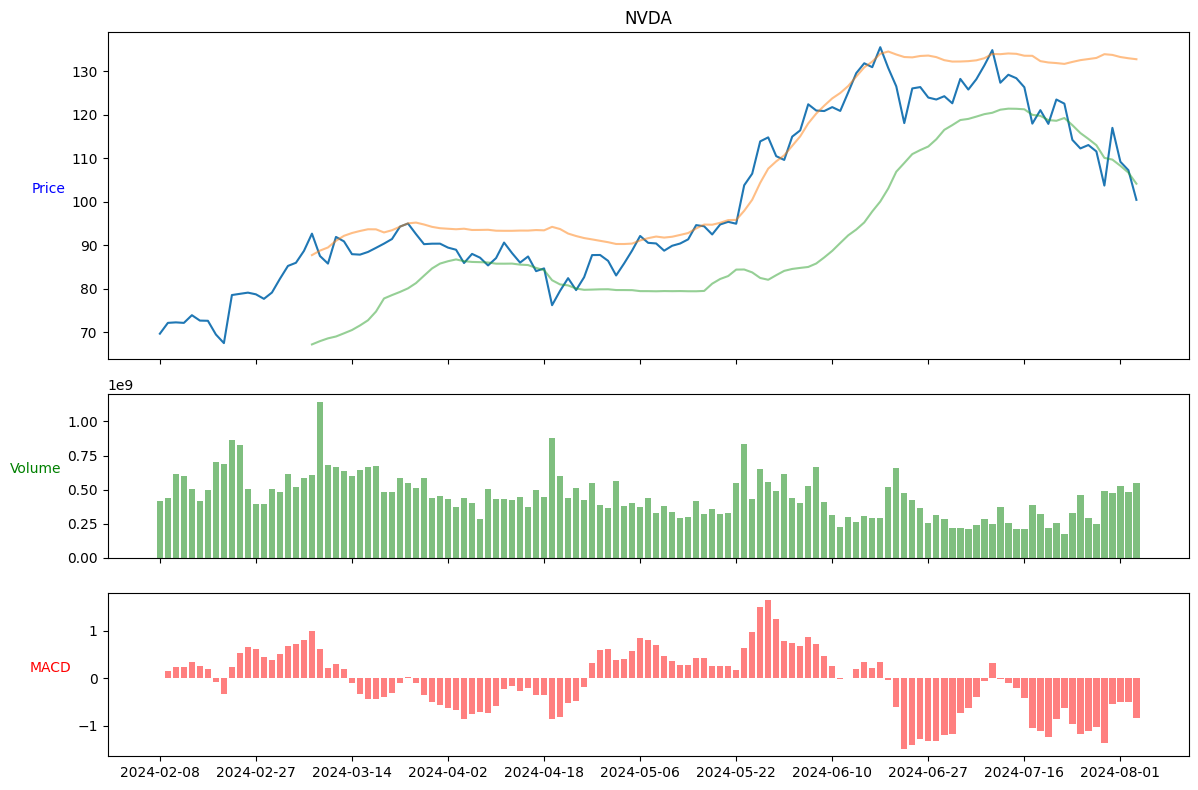

In [16]:
# 創建三個子圖
fig, (ax1, ax2, ax3) = plt.subplots(3, 1,
                    figsize=(12, 8),
                    gridspec_kw={'height_ratios': [2, 1, 1]},
                    sharex=True)

# 設定 x 軸時間
num = 10
date = new_df["Date"].dt.strftime('%Y-%m-%d')

# 繪製收盤價
ax1.plot(new_df['Close'], label='Close')
# 加入布林通道
ax1.plot(new_df['Upper_Band'], alpha=0.5) # alpha 設定透明度
ax1.plot(new_df['Lower_Band'], alpha=0.5)
ax1.set_title(f'{stock_id}')
ax1.set_ylabel('Price', color='blue', rotation=0, ha='right')
ax1.set_xticks(date[::len(date)//num].index)
ax1.set_xticklabels(date[::len(date)//num])

# 繪製交易量
ax2.bar(new_df.index, new_df['Volume'], alpha=0.5, color='green')
ax2.set_ylabel('Volume', color='green', rotation=0, ha='right')

# 繪製技術指標
ax3.bar(new_df.index, new_df['MACD_Histogram'], alpha=0.5, color='red')
ax3.set_ylabel('MACD', color='red', rotation=0, ha='right')

# 調整子圖間的距離
plt.tight_layout()

# 顯示圖表
plt.show()

### 繪製 K 線圖：mplfinance

### 1️⃣6️⃣ 匯入技術分析繪圖套件

In [17]:
!pip install mplfinance
import mplfinance as mpf

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 1.3 MB/s eta 0:00:00


### 1️⃣7️⃣ 選擇資料時間

In [18]:
kplot_df = new_df.set_index('Date')
kplot_df = kplot_df['2024-01-01':'2024-06-30']
kplot_df.tail()

,Open,High,Low,Close,Adj Close,Volume,8_day_MA,13_day_MA,EMA_8,EMA_13,MACD,MACD_Signal,MACD_Histogram,RSI,Upper_Band,Lower_Band,OBV
Date,,,,,,,,,,,,,,,,,
2024-06-24,123.239998,124.459999,118.040001,118.110001,118.110001,476060900,128.588750,125.825847,125.865724,123.885049,1.980675,3.471163,-1.490488,53.477657,133.319415,108.930685,25005051700
2024-06-25,121.199997,126.500000,119.320000,126.089996,126.089996,425787500,128.700000,126.106616,125.915562,124.200041,1.715521,3.120035,-1.404514,59.416271,133.237379,110.974821,25430839200
2024-06-26,126.129997,128.119995,122.599998,126.400002,126.400002,362975900,128.298750,126.522154,126.023215,124.514321,1.508894,2.797807,-1.288912,54.345533,133.556540,111.905561,25793815100
2024-06-27,124.099998,126.410004,122.919998,123.989998,123.989998,252571700,127.312499,126.760769,125.571389,124.439418,1.131971,2.464640,-1.332668,53.214987,133.652549,112.726052,25793815100
2024-06-28,124.580002,127.709999,122.750000,123.540001,123.540001,315516700,126.382500,126.895385,125.119970,124.310930,0.809040,2.133520,-1.324480,52.828980,133.297481,114.385120,25793815100


### 1️⃣8️⃣ 用 mplfinance 繪製 K 線圖

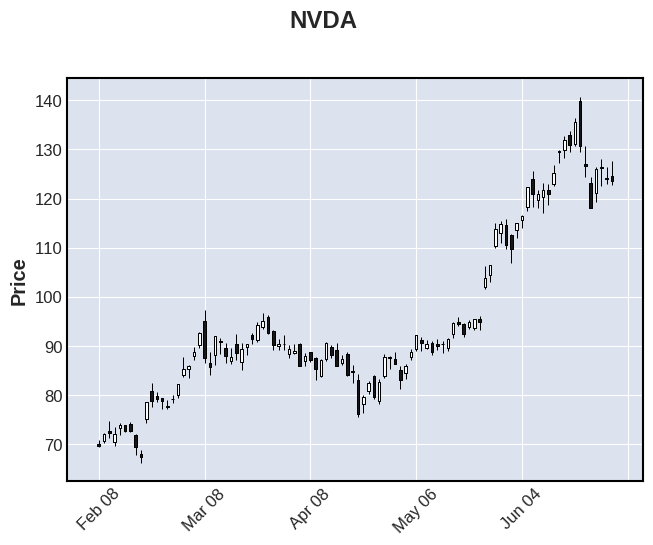

In [19]:
mpf.plot(kplot_df, type='candle', title=f'{stock_id}')

### 1️⃣9️⃣ 加入繪圖設定

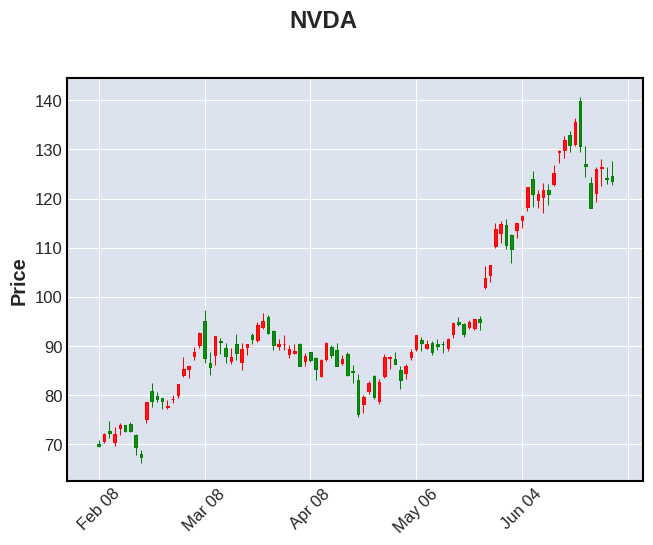

In [20]:
# 設置繪圖風格
my_color = mpf.make_marketcolors(up='r', down='g', inherit=True)
my_style = mpf.make_mpf_style(base_mpf_style='default',
                marketcolors=my_color)
# base_mpf_style='default'的部分，可以用'yahoo'、'binance'、'nightclouds'、'blueskies'、'sas'等風格去替代

# 使用 mplfinance 繪製 K 線圖
mpf.plot(kplot_df, type='candle',
    style=my_style, title=f'{stock_id}')

### 2️⃣0️⃣ 加入子圖

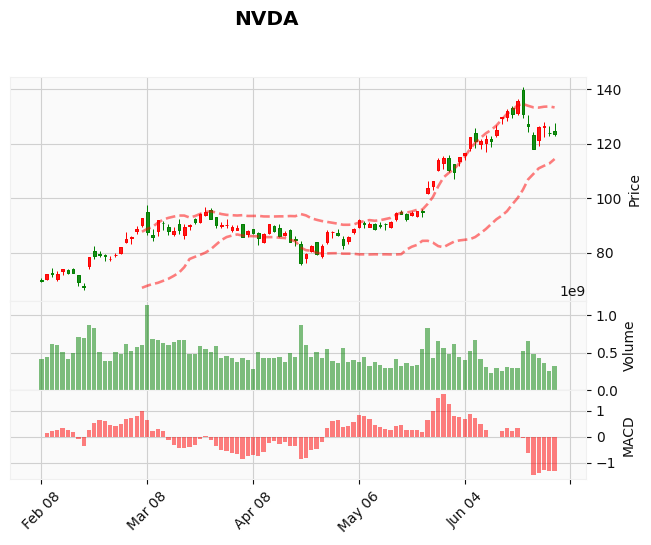

In [21]:
# 設置繪圖風格
my_color = mpf.make_marketcolors(up='r', down='g', inherit=True)
my_style = mpf.make_mpf_style(base_mpf_style='yahoo',
                marketcolors=my_color)

# 交易量和技術指標子圖
ap = [
    # 上軌線
    mpf.make_addplot(kplot_df['Upper_Band'], color='red',
                      alpha=0.5, linestyle='--'),
    # 下軌線
    mpf.make_addplot(kplot_df['Lower_Band'], color='red',
                     alpha=0.5, linestyle='--'),
    # 成交量
    mpf.make_addplot(kplot_df['Volume'], panel=1, type='bar',
                     color='g', alpha=0.5, ylabel='Volume'),
    # MACD
    mpf.make_addplot(kplot_df['MACD_Histogram'], panel=2, type='bar',
                     color='r', alpha=0.5, ylabel='MACD')
]

# 使用 mplfinance 繪製 K 線圖
mpf.plot(kplot_df, type='candle', addplot=ap,
          style=my_style, title=f'{stock_id}')

## 4-3 plotly 互動式圖表

### 2️⃣1️⃣ 檢視資料

In [22]:
bk_df = new_df
bk_df.index = bk_df["Date"].dt.strftime('%Y-%m-%d')
bk_df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume,8_day_MA,13_day_MA,EMA_8,EMA_13,MACD,MACD_Signal,MACD_Histogram,RSI,Upper_Band,Lower_Band,OBV
Date,,,,,,,,,,,,,,,,,,
2024-07-30,2024-07-30,111.519997,111.989998,102.540001,103.730003,103.730003,486833300,114.871249,118.622307,113.628469,116.649085,-3.020616,-1.650309,-1.370306,21.043835,133.971199,110.104802,28191600100
2024-07-31,2024-07-31,112.900002,118.339996,110.879997,117.019997,117.019997,473174200,114.757499,117.682307,114.382142,116.702072,-2.319930,-1.784234,-0.535697,41.294863,133.803188,109.707812,28664774300
2024-08-01,2024-08-01,117.529999,120.160004,106.809998,109.209999,109.209999,523462300,112.966249,116.203076,113.232777,115.631776,-2.398999,-1.907187,-0.491813,34.730897,133.315620,108.288380,28664774300
2024-08-02,2024-08-02,103.760002,108.720001,101.370003,107.269997,107.269997,482027500,111.051249,114.734614,111.907714,114.437236,-2.529522,-2.031654,-0.497868,34.137562,133.036140,106.711859,28664774300
2024-08-05,2024-08-05,92.059998,103.410004,90.690002,100.449997,100.449997,549739200,109.326248,113.385383,109.361555,112.439059,-3.077504,-2.240824,-0.836680,31.873507,132.809644,104.163356,28664774300


### 2️⃣2️⃣ 匯入 plotly 套件

In [23]:
import plotly.graph_objects as go

### 2️⃣3️⃣ 繪製互動式 K 線圖

In [24]:
# 創建 K 線圖
fig = go.Figure(data=[go.Candlestick(x=bk_df.index,
            open=bk_df['Open'],
            high=bk_df['High'],
            low=bk_df['Low'],
            close=bk_df['Close'],
            increasing_line_color='red',
            decreasing_line_color='green')])

# 調整寬高
fig.update_layout(
    height=800,
    width=1200
)

# 顯示圖表
fig.show()

### 2️⃣4️⃣ 移除非交易日空值
解決繪圖不連續問題

In [25]:
# 創建 K 線圖
fig = go.Figure(data=[go.Candlestick(x=bk_df.index,
            open=bk_df['Open'],
            high=bk_df['High'],
            low=bk_df['Low'],
            close=bk_df['Close'],
            increasing_line_color='red',
            decreasing_line_color='green')])

# 調整寬高
fig.update_layout(
    height=800,
    width=1200
)

# 移除非交易日空值
# 生成該日期範圍內的所有日期
all_dates = pd.date_range(start=bk_df.index.min(),
              end=bk_df.index.max())
# 找出不在資料中的日期
breaks = all_dates[~all_dates.isin(bk_df.index)]
dt_breaks = breaks.tolist() # 轉換成列表
fig.update_xaxes(rangebreaks=[{'values': dt_breaks}])

# 顯示圖表
fig.show()

### 2️⃣5️⃣ 加入懸停十字軸

In [26]:
# 創建 K 線圖
fig = go.Figure(data=[go.Candlestick(x=bk_df.index,
            open=bk_df['Open'],
            high=bk_df['High'],
            low=bk_df['Low'],
            close=bk_df['Close'],
            increasing_line_color='red',
            decreasing_line_color='green')])


# 圖表更新-加入懸停十字軸
fig.update_xaxes(showspikes=True, spikecolor="gray",
                 spikemode="across")
fig.update_yaxes(showspikes=True, spikecolor="gray",
                 spikemode="across")
fig.update_layout(
    height=800,
    width=1200
)


# 移除非交易日空值
all_dates = pd.date_range(start=bk_df.index.min(), end=bk_df.index.max()) # 生成該日期範圍內的所有日期
breaks = all_dates[~all_dates.isin(bk_df.index)] # 找出不在資料中的日期
dt_breaks = breaks.tolist() # 轉換成列表
fig.update_xaxes(rangebreaks=[{'values': dt_breaks}])

fig.show()

### 2️⃣6️⃣ 加入技術指標

In [27]:
# 創建 K 線圖
fig = go.Figure(data=[go.Candlestick(x=bk_df.index,
            open=bk_df['Open'],
            high=bk_df['High'],
            low=bk_df['Low'],
            close=bk_df['Close'],
            increasing_line_color='red', decreasing_line_color='green',
            name = "K 線")])


# 布林通道
fig.add_trace(go.Scatter(
    x=bk_df.index, y=bk_df['Upper_Band'],mode='lines',
    line={'color': 'green','dash': 'dash'},name = "上軌線"))
fig.add_trace(go.Scatter(
    x=bk_df.index, y=bk_df['Lower_Band'], mode='lines',
    line={'color': 'green', 'dash': 'dash'},name = "下軌線"))

# 交易量
fig.add_trace(go.Bar(
    x=bk_df.index, y=bk_df['Volume'], marker={'color': 'green'},
      yaxis='y2', name = "交易量"))

# MACD
fig.add_trace(go.Bar(
    x=bk_df.index, y=bk_df['MACD_Histogram'], marker={'color': 'red'},
      yaxis='y3', name = "MACD"))

# 加入懸停十字軸
fig.update_xaxes(showspikes=True, spikecolor="gray",
                 spikemode="toaxis")
fig.update_yaxes(showspikes=True, spikecolor="gray",
                 spikemode="across")

# 更新畫布大小並增加範圍選擇
fig.update_layout(
    height=800,
    yaxis={'domain': [0.35, 1]},
    yaxis2={'domain': [0.15, 0.3]},
    yaxis3={'domain': [0, 0.15]},
    title=f"{stock_id}",
    xaxis={
        # 範圍選擇格
        'rangeselector': {
            'buttons': [
                {'count': 1, 'label': '1M',
                  'step': 'month', 'stepmode': 'backward'},
                {'count': 6, 'label': '6M',
                  'step': 'month', 'stepmode': 'backward'},
                {'count': 1, 'label': '1Y',
                  'step': 'year', 'stepmode': 'backward'},
                {'step': 'all'}
            ]
        },
        # 範圍滑動條
        'rangeslider': {
            'visible': True,
            # 滑動條的高度 (設置 0.01 就會變單純的 bar)
            'thickness': 0.01,
            'bgcolor': "#E4E4E4"  # 背景色
        },
        'type': 'date'
    }
)


# 移除非交易日空值
all_dates = pd.date_range(start=bk_df.index.min(), end=bk_df.index.max()) # 生成該日期範圍內的所有日期
breaks = all_dates[~all_dates.isin(bk_df.index)] # 找出不在資料中的日期
dt_breaks = breaks.tolist() # 轉換成列表
fig.update_xaxes(rangebreaks=[{'values': dt_breaks}])

fig.show()

### 2️⃣7️⃣ 寫成函式

In [28]:
# 下載資料並讓 AI 計算指標
def download_stock_data(stock_id, start=None,
                        end=None, indicator='MACD'):
    stock_id = f"{stock_id}.tw"
    if not end:
        end = dt.date.today()
    if not start:
        start = end - dt.timedelta(days=365)
    # 從 yf 下載資料
    df = yf.download(stock_id, start=start, end=end).reset_index()

    # AI 計算技術指標
    code_str = ai_helper(df, f"計算{indicator}")
    print(code_str)

    # 將 exec 生成的 calculate 設為局部變數
    local_vars = {}
    exec(code_str, globals(), local_vars)
    calculate = local_vars['calculate']

    df = calculate(df)

    # 資料處理
    bk_df = df.reset_index()
    bk_df.index = bk_df["Date"].dt.strftime('%Y-%m-%d')

    return bk_df

# 繪製圖表函式
def create_stock_figure(stock_id, bk_df):

    # 創建 K 線圖
    fig = go.Figure(data=[go.Candlestick(x=bk_df.index,
                        open=bk_df['Open'],
                        high=bk_df['High'],
                        low=bk_df['Low'],
                        close=bk_df['Close'],
                        increasing_line_color='red',
                        decreasing_line_color='green',
                        name = "K 線")])

    # 交易量
    fig.add_trace(go.Bar(x=bk_df.index, y=bk_df['Volume'],
                         marker={'color': 'green'}, yaxis='y2',
                           name = "交易量"))

    # 找出需要繪製的欄位
    columns = bk_df.columns
    exclude_columns = ['index','Date', 'Open', 'High',
                        'Low', 'Close', 'Adj Close', 'Volume']
    remain_columns = [col for col in columns if
                       col not in exclude_columns]
    min_close = bk_df['Close'].min() - bk_df['Close'].std()
    max_close = bk_df['Close'].max() + bk_df['Close'].std()
    # 繪製技術指標
    for i in remain_columns:
      if min_close <= bk_df[i].mean() <= max_close:
        fig.add_trace(go.Scatter(x=bk_df.index, y=bk_df[i],
                                  mode='lines', name=i))
      else:
        fig.add_trace(go.Scatter(x=bk_df.index, y=bk_df[i],
                                  mode='lines', yaxis='y3', name=i))

    # 加入懸停十字軸
    fig.update_xaxes(showspikes=True, spikecolor="gray",
                    spikemode="toaxis")
    fig.update_yaxes(showspikes=True, spikecolor="gray",
                    spikemode="across")
    # 更新畫布大小並增加範圍選擇
    fig.update_layout(
        height=800,
        width=1200,
        yaxis={'domain': [0.35, 1]},
        yaxis2={'domain': [0.15, 0.3]},
        # 若要重疊 y1 和 y3, 可以改成
        # yaxis3=dict(overlaying='y', side='right')
        yaxis3={'domain': [0, 0.15]},
        title=f"{stock_id}",
        xaxis={
            # 範圍選擇格
            'rangeselector': {
                'buttons': [
                    {'count': 1, 'label': '1M',
                      'step': 'month', 'stepmode': 'backward'},
                    {'count': 6, 'label': '6M',
                      'step': 'month', 'stepmode': 'backward'},
                    {'count': 1, 'label': '1Y',
                      'step': 'year', 'stepmode': 'backward'},
                    {'step': 'all'}
                ]
            },
            # 範圍滑動條
            'rangeslider': {
                'visible': True,
                'thickness': 0.01,  # 滑動條的高度
                'bgcolor': "#E4E4E4"  # 背景色
            },
            'type': 'date'
        }
    )

    # 移除非交易日空值
    # 生成該日期範圍內的所有日期
    all_dates = pd.date_range(start=bk_df.index.min(),
                               end=bk_df.index.max())
    # 找出不在資料中的日期
    breaks = all_dates[~all_dates.isin(bk_df.index)]
    dt_breaks = breaks.tolist() # 轉換成列表格式
    fig.update_xaxes(rangebreaks=[{'values': dt_breaks}])

    return fig

# 主函式
def plotly_stock(stock_id, start=None, end=None, indicator='MACD'):

    df = download_stock_data(stock_id, start, end, indicator)
    fig = create_stock_figure(stock_id,df)
    fig.show()

### 2️⃣8️⃣ 執行函式

In [29]:
plotly_stock("2317", start='2022-01-01', end= None,
             indicator='布林通道及MACD')

[*********************100%%**********************]  1 of 1 completed


def calculate(df):
    df['20SMA'] = df['Close'].rolling(window=20).mean()
    df['Upper_band'] = df['20SMA'] + 2 * (df['Close'].rolling(window=20).std())
    df['Lower_band'] = df['20SMA'] - 2 * (df['Close'].rolling(window=20).std())
    
    shortEMA = df['Close'].ewm(span=12, adjust=False).mean()
    longEMA = df['Close'].ewm(span=26, adjust=False).mean()
    
    df['MACD'] = shortEMA - longEMA
    df['Signal_line'] = df['MACD'].ewm(span=9, adjust=False).mean()
    
    return df
